# Reference
<pre>
http://adventuresinmachinelearning.com/word2vec-tutorial-tensorflow/
http://adventuresinmachinelearning.com/gensim-word2vec-tutorial/
http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.WuzEqohuaUk (about parameter of Word2Vec)
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne (about Visualization with TSNE)

# Package

In [7]:
import pandas as pd
import numpy as np
import re
import os

import gensim

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Steps
<pre>
1. Clean the data
2. Build a corpus(a list of lists containing words from each lyrics)
3. Train a Word2Vec model
4. Visualize t-SNE representation of the most common words

# Summary

In [8]:

os.chdir("C:\\Users\\snuist\\Desktop\\Git\\text-generator")

#import data
top100artist = pd.read_csv('./data/top100artist.csv', header=None) #raw data
data = top100artist.copy()
#set columns
data.columns = ['artist', 'song', 'link', 'text']
lyrics = data['text']

#data_cleansing
def data_cleansing(data):
    lyrics = str(data)
    lyrics = lyrics.lower()
    lyrics = lyrics.replace('\r', ' ')
    lyrics = lyrics.replace('\n', ' ')
    lyrics = lyrics.replace('.', ' EOS ') # . -> End Of Sentence
    lyrics = lyrics.replace('?', ' QM ') # ? -> Q (Question mark)
    lyrics = lyrics.replace('!', ' EM ') # ! -> EM (Exclamation mark)
    lyrics = lyrics.replace(',', ' COMMA ') # , -> Comma
    lyrics = lyrics.replace("'", '') # for he's -> hes, it's -> its, don't -> dont
    lyrics = re.sub("[^a-zA-Z]"," ", lyrics)
    return lyrics + "END" # End of one song 

#cleansing all lyrics and making word tokens list
words = [] #A list of all lyric tokens
for i in range(len(lyrics)):
    tokens = data_cleansing(lyrics[i]).split()
    words.append(tokens)

#Building vocabulary and Training the word2vec model
model = gensim.models.Word2Vec(words,
                               iter = 10, #the number of iteration(epochs) over the corpus
                               size=300, #the size of the dense vector to represent each token. 
                               window=10, #the maximum distance between the target word and it's neighboring word.
                               min_count=10,
                               workers=10)

# save and reload the model
# model.save("word2vec_model")
# model = gensim.models.Word2Vec.load("word2vec_model")

#Word Vector visualization with T-SNE

#Building vocabulary and Training the word2vec model
#assign higher min_count to make more selective model
model_for_tsne = gensim.models.Word2Vec(words,
                               iter = 10, #the number of iteration(epochs) over the corpus
                               size=300, #the size of the dense vector to represent each token. 
                               window=10, #the maximum distance between the target word and it's neighboring word.
                               min_count=300, 
                               workers=10)

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    STOP_WORDS = nltk.corpus.stopwords.words() #delete some words to make plot clear
    REPLACED_WORDS = ['EOS', 'QM', 'EM', 'COMMA', 'END', 'verse']
    STOP_WORDS.extend(REPLACED_WORDS)
    
    
    for word in model.wv.vocab:        
        if word not in STOP_WORDS:
            tokens.append(model.wv[word])
            labels.append(word)

    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=22)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
                
    plt.show()
    
tsne_plot(model_for_tsne)


## All codes (include .head()...)

In [182]:
os.chdir("C:\\Users\\snuist\\Desktop\\Git\\text-generator")

In [183]:
#import data
top100artist = pd.read_csv('./data/top100artist.csv', header=None)

In [184]:
data = top100artist.copy()

In [185]:
#set columns
data.columns = ['artist', 'song', 'link', 'text']
data.head()

,artist,song,link,text
0,Aerosmith,All Your Love,/a/aerosmith/all+your+love_20004378.html,All your love I miss lovin' \r\nAll your kiss...
1,Aerosmith,Bacon Biscuit Blues,/a/aerosmith/bacon+biscuit+blues_20004481.html,"Put your biscuits in the oven \r\nHoney, put ..."
2,Aerosmith,Blind Man,/a/aerosmith/blind+man_20004145.html,I took a course in hallelujah \r\nI went to n...
3,Aerosmith,Draw The Line,/a/aerosmith/draw+the+line_20004388.html,"Checkmate honey, beat ya at your own damn game..."
4,Aerosmith,Eat The Rich,/a/aerosmith/eat+the+rich_20004281.html,Well I woke up this morning \r\nOn the wrong ...


In [186]:
data.shape

(17219, 4)

In [187]:
lyrics = data['text']
lyrics[0]

"All your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\n  \r\nEver since I left you baby, I never knew what I was missin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nAll your love I miss lovin'  \r\nAll your kiss I miss kissin'  \r\nEver since I left you baby, I never knew what I was missin'  \r\n  \r\nAll your lovin pretty baby  \r\nThat I had in store for you  \r\nAll your lovin pretty baby  \r\nThat I had in store for you-  \r\nWhat could a poor boy do?  \r\nAll your lovin pretty baby  \r\nAll your lovin pretty baby  \r\nAll your lovin pretty baby  \r\nWhat could a poor boy do?  \r\nAll your lovin pretty babay  \r\nAll your kissin is kissin  \r\nAll the lovin you gave me pretty babay  \r\nEver since I left you baby,  \r\nI never knew what I was missin' aaaah\r\n\r\n"

In [188]:
#to check unique letters
lyrics_characters_only = lyrics.str.cat(sep=' ')
sorted(list(set(lyrics_characters_only)))

['\n',
 '\r',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

## Clean the data

In [189]:
#data_cleansing
def data_cleansing(data):
    lyrics = str(data)
    lyrics = lyrics.lower()
    lyrics = lyrics.replace('\r', ' ')
    lyrics = lyrics.replace('\n', ' ')
    lyrics = lyrics.replace('.', ' EOS ') # . -> End Of Sentence
    lyrics = lyrics.replace('?', ' QM ') # ? -> Q (Question mark)
    lyrics = lyrics.replace('!', ' EM ') # ! -> EM (Exclamation mark)
    lyrics = lyrics.replace(',', ' COMMA ') # , -> Comma
    lyrics = lyrics.replace("'", '') # for he's -> hes, it's -> its, don't -> dont
    lyrics = re.sub("[^a-zA-Z]"," ", lyrics)
    return lyrics + "END" # End of one song 

In [190]:
#to check any random lyrics
print(data_cleansing(lyrics[44]))
print('\n-----------------------------------\n')
print(lyrics[44])

theres a red house over yonder    thats where my baby stays    theres a red house over yonder    thats where my baby stays    i aint been home to see my baby    seems like    and one half days    now wait a minute    i think somethings wrong here    the key wont unlock this damn door    now wait a minute    i think somethings wrong here    the key wont unlock this fucking door    something bad just because of it    my baby dont want me no more    thats her loss COMMA  thats my gain    im gonna head out back yonder COMMA  i think    back yonder over the hill    im gonna head out back yonder COMMA  i think    yonder over the hill    over the hill    cause if my baby dont    love me no more    i know her sister will    END

-----------------------------------

There's a Red House over yonder  
That's where my baby stays  
There's a Red house over yonder  
That's where my baby stays  
I ain't been home to see my baby  
Seems like 99 and one half days  
Now wait a minute  
I think something

In [191]:
#to check unique letters again
cleaned_lyrics = data_cleansing(lyrics)
set(cleaned_lyrics)

{' ',
 'A',
 'C',
 'D',
 'E',
 'M',
 'N',
 'O',
 'Q',
 'S',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

## Build a corpus

In [192]:
#cleansing all lyrics and making word tokens list
words = [] #A list of all lyric tokens
for i in range(len(lyrics)):
    tokens = data_cleansing(lyrics[i]).split()
    words.append(tokens)

In [55]:
print(len(words)) #number of songs
print(type(words))
print(words[:1])

17219
<class 'list'>
[['all', 'your', 'love', 'i', 'miss', 'lovin', 'all', 'your', 'kiss', 'i', 'miss', 'kissin', 'all', 'your', 'love', 'i', 'miss', 'lovin', 'all', 'your', 'kiss', 'i', 'miss', 'kissin', 'ever', 'since', 'i', 'left', 'you', 'baby', 'COMMA', 'i', 'never', 'knew', 'what', 'i', 'was', 'missin', 'all', 'your', 'love', 'i', 'miss', 'lovin', 'all', 'your', 'kiss', 'i', 'miss', 'kissin', 'all', 'your', 'love', 'i', 'miss', 'lovin', 'all', 'your', 'kiss', 'i', 'miss', 'kissin', 'ever', 'since', 'i', 'left', 'you', 'baby', 'COMMA', 'i', 'never', 'knew', 'what', 'i', 'was', 'missin', 'all', 'your', 'lovin', 'pretty', 'baby', 'that', 'i', 'had', 'in', 'store', 'for', 'you', 'all', 'your', 'lovin', 'pretty', 'baby', 'that', 'i', 'had', 'in', 'store', 'for', 'you', 'what', 'could', 'a', 'poor', 'boy', 'do', 'QM', 'all', 'your', 'lovin', 'pretty', 'baby', 'all', 'your', 'lovin', 'pretty', 'baby', 'all', 'your', 'lovin', 'pretty', 'baby', 'what', 'could', 'a', 'poor', 'boy', 'do', '

## Train Word2Vec Model and build vocabulary

In [163]:
#Building vocabulary and Training the word2vec model
model = gensim.models.Word2Vec(words,
                               iter = 10, #the number of iteration(epochs) over the corpus
                               size=300, #the size of the dense vector to represent each token. 
                               window=10, #the maximum distance between the target word and it's neighboring word.
                               min_count=10,
                               workers=10)

<pre>
Parameter
-size: the size of dense vector to represent each token. If we have limited data, then size should be a smaller value.
-window: the maximum distance between the target word and it's neighboring word. If our data is not sparse, then the size of window should not matter too much, as long as it's not overly narrow or broad.
-min_count: minimum frequeny count of words. The model would ignore words that do not satisfy the min_count. Unless our dataset is really tiny, this does not really affect the model in terms of our final result.
-workers: how many threads to use behind the scenes?

### Check the Word2Vec Model

In [164]:
#get the word vector of "love"
print(model.wv['love'])

[ 2.07613930e-01 -2.36473012e+00 -6.36375129e-01 -4.02486533e-01
  5.65839410e-01  6.89518332e-01 -1.22549093e+00  3.08207726e+00
 -1.71363354e+00 -7.16459826e-02  8.54898572e-01 -5.88758469e-01
  1.66232646e+00 -9.34136733e-02  9.80233967e-01  1.13927269e+00
 -8.30733538e-01 -4.10075998e+00  1.42158949e+00  1.77207804e+00
  5.20288050e-01 -1.54149160e-01 -5.23690760e-01  6.32259429e-01
 -2.54328996e-01  3.41277331e-01  6.92591906e-01  8.53648663e-01
  2.03212905e+00  1.04241453e-01 -2.10705495e+00  8.22045445e-01
  5.61942339e-01  8.77372682e-01  1.03421462e+00  8.90237212e-01
 -9.61563349e-01 -5.52080525e-03  1.57920778e+00 -8.63529861e-01
 -1.04652035e+00 -1.57151151e+00 -3.10099363e-01 -7.29830444e-01
  1.17115963e+00  1.34446681e+00 -1.16454744e+00  3.65366668e-01
  5.65168858e-01 -4.28349346e-01  6.84177339e-01 -1.09868300e+00
  1.56991613e+00 -1.27897334e+00  3.08988124e-01 -1.13433516e+00
 -5.53328037e-01 -4.47132260e-01 -4.44900244e-01  5.01892686e-01
 -1.85773984e-01 -3.91343

In [165]:
#to look at some output
w1 = ['love']
model.wv.most_similar(positive=w1, topn=6)

[('loving', 0.4939269721508026),
 ('END', 0.49127477407455444),
 ('you', 0.4735787510871887),
 ('heart', 0.46841704845428467),
 ('baby', 0.4635758697986603),
 ('true', 0.46325427293777466)]

In [166]:
#to look at some output
w2 = ['hate']
model.wv.most_similar(positive=w2, topn=6)

[('hater', 0.4702364504337311),
 ('fuck', 0.46004271507263184),
 ('shit', 0.4315396845340729),
 ('fucking', 0.4273042678833008),
 ('rape', 0.39254269003868103),
 ('despise', 0.3634592592716217)]

In [167]:
#to look at some output
w3 = ['somewhere', 'over', 'the']
model.wv.most_similar(positive=w3, topn=10)

[('rainbow', 0.3516653776168823),
 ('horizon', 0.3120746612548828),
 ('rainin', 0.30606573820114136),
 ('daylight', 0.30563074350357056),
 ('rushing', 0.29589059948921204),
 ('where', 0.28931155800819397),
 ('darkness', 0.28674277663230896),
 ('twilight', 0.28214773535728455),
 ('rainbows', 0.2779337167739868),
 ('backwards', 0.27516788244247437)]

In [168]:
print(w3, model.wv.most_similar(positive=w3, topn=1)[0][0])

['somewhere', 'over', 'the'] rainbow


In [169]:
#similarity between two words
print(model.wv.similarity('cool', 'fool'))

0.28003874175892773


In [170]:
#similarity between two words
print(model.wv.similarity('woman', 'man'), model.wv.similarity('queen', 'king'))

0.5371922381172436 0.4913458137230938


In [171]:
#get the most common 30 words
for i in range(30):
    print("#i:   ", model.wv.index2word[i])

#i:    COMMA
#i:    the
#i:    i
#i:    you
#i:    and
#i:    to
#i:    a
#i:    me
#i:    my
#i:    in
#i:    EOS
#i:    of
#i:    it
#i:    your
#i:    on
#i:    that
#i:    love
#i:    all
#i:    im
#i:    be
#i:    for
#i:    is
#i:    dont
#i:    but
#i:    its
#i:    so
#i:    just
#i:    we
#i:    know
#i:    with


# add) save and reload the model

In [128]:
##save and reload the model
#os.getcwd()
#model.save("word2vec_model")
#model = gensim.models.Word2Vec.load("word2vec_model")

# T-SNE Visualization

In [160]:
#Building vocabulary and Training the word2vec model
#assign higher min_count to make more selective model
model_for_tsne = gensim.models.Word2Vec(words,
                               iter = 10, #the number of iteration(epochs) over the corpus
                               size=300, #the size of the dense vector to represent each token. 
                               window=10, #the maximum distance between the target word and it's neighboring word.
                               min_count=300,
                               workers=10)

In [161]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    STOP_WORDS = nltk.corpus.stopwords.words() #delete some words to make plot clear
    REPLACED_WORDS = ['EOS', 'QM', 'EM', 'COMMA', 'END', 'verse']
    STOP_WORDS.extend(REPLACED_WORDS)
    
    
    for word in model.wv.vocab:        
        if word not in STOP_WORDS:
            tokens.append(model.wv[word])
            labels.append(word)

    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=22)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
                
    plt.show()

<pre>
TSNE_paramters
- perpiexity: The perplexity is related to the number of neares neigbors that is used in other manifold learning algorithms. larger datasets usually require a larger perplexity. usually consider a value 5~50 but not extremly critical since T-SNE is quite insensitive to this paramter.
- n_components: Dimension of the embedded space. #default:2 dim
- init: initialization of embedding. possible option is random/pca/numpy array of shape. pca initialization cannot be used with precomputed distances and is usally more globally stable than random initialization.
- n_iter: maximum number of iterations for the optimization. should be at least 250.
- random_state: Pseudo random number generator seed control. If None, use the numpy.random singleton.

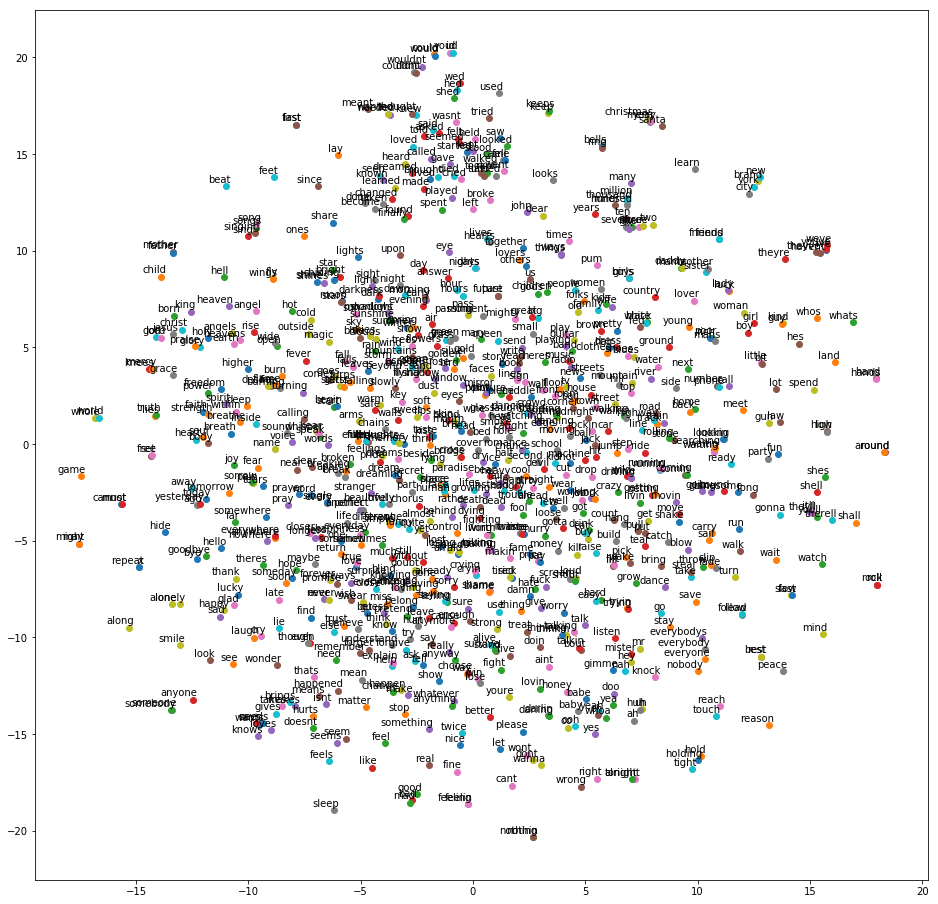

In [162]:
tsne_plot(model_for_tsne)

## add) create embedding matrix

In [21]:
def create_embedding_matrix(model):
    # convert the wv word vectors into a numpy matrix that is suitable for insertion
    # into TensorFlow or Keras models
    embedding_matrix = np.zeros((len(model.wv.vocab), vector_dim))
    for i in range(len(model.wv.vocab)):
        embedding_vector = model.wv[model.wv.index2word[i]]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [24]:
vector_dim = 300
embedding_matrix = create_embedding_matrix(model)
embedding_matrix

array([[ 0.17017898, -0.55816996,  0.10880011, ..., -0.55022764,
        -0.53557616,  0.39784628],
       [ 0.61781871,  1.28828919,  1.31865263, ..., -0.86943537,
         0.29751059,  0.6118561 ],
       [ 0.03564065, -0.90311396, -0.03055992, ...,  0.69983315,
        -0.09140585, -1.13419271],
       ...,
       [ 0.43963692, -0.75920123,  1.4358989 , ..., -0.44081855,
        -1.31761897, -0.25687832],
       [ 0.4735989 , -1.67026687,  0.5699541 , ..., -0.03009037,
         0.14124617, -0.85934556],
       [-0.96901816, -0.70971286,  0.54715157, ..., -0.19076252,
         1.71859622,  0.0113165 ]])